# Modelagem de um pêndulo duplo com mecânica Lagrangeana

## PyMech

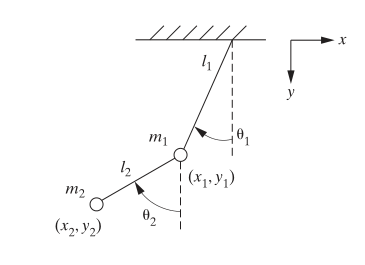

## Definindo as variáveis simbólicas

In [1]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
from scipy.integrate import odeint
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [2]:
m1,m2,l1,l2,g,t  = sym.symbols('m1 m2 l1 l2 g t')
the1,the2 = sym.symbols(r'theta1 theta2',cls=sym.Function)

Definindo as derivadas de  $\theta$ no tempo.

In [9]:
the1 = the1(t)
the2 = the2(t)
the1_d = sym.diff(the1,t)
the2_d = sym.diff(the2,t)
the1_dd = sym.diff(the1_d,t)
the2_dd = sym.diff(the2_d,t)

Definindo as variáveis x e y das duas massas

In [12]:
x1 = -l1*sym.sin(the1)
y1 = -l1*sym.cos(the1)
x2 = -l2*sym.sin(the2) + x1
y2 = -l2*sym.cos(the2) + y1

## Equação de Lagrange

Defininindo os valores de energia cinética (T) e energia potencial (U) de cada massa

$ T = \frac{mV^2}{2} $

$ U = mgh $

Neste caso, a única energia potencial é a gravitacional (Não considerando os efeitos elásticos do sistema).

O Lagrangiano (L) pode ser definido como a diferença da energia cinética pela potencial

$ L = T - U $

In [13]:
T1 = 1/2*m1*(sym.diff(x1,t)**2 + sym.diff(y1,t)**2)
U1 = y1*m1*g

T2 = 1/2*m2*(sym.diff(x2,t)**2 + sym.diff(y2,t)**2)
U2 = y2*m2*g

T = T1 + T2
U = U1 + U2

L = T - U
L

g*l1*m1*cos(theta1(t)) - g*m2*(-l1*cos(theta1(t)) - l2*cos(theta2(t))) + 0.5*m1*(l1**2*sin(theta1(t))**2*Derivative(theta1(t), t)**2 + l1**2*cos(theta1(t))**2*Derivative(theta1(t), t)**2) + 0.5*m2*((l1*sin(theta1(t))*Derivative(theta1(t), t) + l2*sin(theta2(t))*Derivative(theta2(t), t))**2 + (-l1*cos(theta1(t))*Derivative(theta1(t), t) - l2*cos(theta2(t))*Derivative(theta2(t), t))**2)

A equação de Lagrange é

$ \frac{d}{dt}\frac{\partial L}{\partial \dot{q}_i} - \frac{\partial L}{\partial q_i} = Q_i $

Onde $ q_i $ são as variáveis independentes do sistema

$ q_1 = \theta_1 $

$ q_2 = \theta_2 $

e $ Q_i $ representa a perda de energia do sistema. Como ele é conservativo, $ Q_i = 0 $.

In [16]:
EqL1 = (sym.diff(sym.diff(L,the1_d),t)-sym.diff(L,the1)).simplify()
EqL2 = (sym.diff(sym.diff(L,the2_d),t)-sym.diff(L,the2)).simplify()
EqL1

l1*(g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l1*m1*Derivative(theta1(t), (t, 2)) + l1*m2*Derivative(theta1(t), (t, 2)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2 + l2*m2*cos(theta1(t) - theta2(t))*Derivative(theta2(t), (t, 2)))

Nota-se que para $\ddot{\theta}_i $, a equação é linear, portanto resolveremos as duas equações de Lagrange (que são iguais à 0) para $\ddot{\theta}_1$ e $\ddot{\theta}_2$. 

In [18]:
sol = sym.solve([EqL1,EqL2],(the1_dd,the2_dd))
sol[the1_dd]

g*m1*sin(theta1(t))*cos(theta1(t) - theta2(t))/(l2*m1 - l2*m2*cos(theta1(t) - theta2(t))**2 + l2*m2) - g*m1*sin(theta2(t))/(l2*m1 - l2*m2*cos(theta1(t) - theta2(t))**2 + l2*m2) + g*m2*sin(theta1(t))*cos(theta1(t) - theta2(t))/(l2*m1 - l2*m2*cos(theta1(t) - theta2(t))**2 + l2*m2) - g*m2*sin(theta2(t))/(l2*m1 - l2*m2*cos(theta1(t) - theta2(t))**2 + l2*m2) + l1*m1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2/(l2*m1 - l2*m2*cos(theta1(t) - theta2(t))**2 + l2*m2) + l1*m2*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2/(l2*m1 - l2*m2*cos(theta1(t) - theta2(t))**2 + l2*m2) + l2*m2*sin(theta1(t) - theta2(t))*cos(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2/(l2*m1 - l2*m2*cos(theta1(t) - theta2(t))**2 + l2*m2)

Agora temos um sistema do tipo

$ \frac{d^2\theta_i}{dt^2} = f(\theta_i, \frac{d\theta_i}{dt}) $

Que é uma EDO

## Equações diferenciais resultantes

Agora, com o valor da segunda derivada dois dois thetas ($d^2\theta_i/dt^2$), temos um conjunto de equações diferenciais de segunda ordem.


Para resolver esse tipo de problema com o Python, basta escrever essas EDOs como de primeira ordem. Assim,

- $ v_i = \frac{d\theta_i}{dt} $
- $ dv_i/dt = \frac{d^2\theta_i}{dt^2} $

Agora, ao invés de termos 2 EDOs de segunda ordem, temos um sistema de 4 EDOs de primeira ordem.

- $ EDO_1 \rightarrow v_1= \frac{d\theta_1}{dt} $ 
- $ EDO_2 \rightarrow v_2= \frac{d\theta_2}{dt} $ 
- $ EDO_3 \rightarrow dv_1/dt= \frac{d^2\theta_2}{dt^2} $ 
- $ EDO_4 \rightarrow dv_2/dt=\frac{d^2\theta_2}{dt^2} $ 


Para resolver essas EDOs, é preciso converter os valores algébricos para valores numéricos. Para isso, usaremos a função ``lambdify()`` .

In [21]:
v1_f = sym.lambdify(the1_d,the1_d)
v2_f = sym.lambdify(the2_d,the2_d)

dv1_f = sym.lambdify((t,g,m1,m2,l1,l2,the1,the2,the1_d,the2_d),sol[the1_dd])
dv2_f = sym.lambdify((t,g,m1,m2,l1,l2,the1,the2,the1_d,the2_d),sol[the2_dd])

Agora as equações estão prontas para serem resolvidas. 

Para resolver esse conjunto de EDOs, temos que definir uma função que toma os valores de input ($\theta_1,\theta_2,v_1,v_2$) e tempo retornará sua derivada. 

- $ S = (\theta_1,\theta_2,v_1,v_2) $
- $ dS/dt = (v_1,v_2,dv_1/dt,dv_2/dt) $

In [22]:
def dSdt(S,t,g,m1,m2,l1,l2):
    the1, the2, v1, v2 = S
    return[
        v1_f(v1),
        v2_f(v2),
        dv1_f(t,g,m1,m2,l1,l2,the1,the2,v1,v2),
        dv2_f(t,g,m1,m2,l1,l2,the1,the2,v1,v2),
    ]

## Solução numérica

Finalmente, adotando valores numéricos para as constantes e usando a função ```odeint()```, conseguimos obter a solução

In [23]:
t_f = 50 #s
n_passo = 1000
t = np.linspace(0,t_f,n_passo)

# ===== Valores das constantes
m1 = 3 # Kg
m2 = 3 # Kg
l1 = 1 # m
l2 = 1.5 # m
g = 9.8 # m/s2

# ===== Condições iniciais para os três casos
the1_10 = 2 # rad
the2_10 = 2 # rad
dthe1_10 = 0  # rad/s
dthe2_10 = 0  # rad/s

the1_20 = 2.01 # rad
the2_20 = 2.01 # rad
dthe1_20 = 0  # rad/s
dthe2_20 = 0 # rad/s

the1_30 = 1.99 # rad
the2_30 = 1.99 # rad
dthe1_30 = 0  # rad/s
dthe2_30 = 0  # rad/s

resposta1 = odeint(dSdt,y0=[the1_10,the2_10,dthe1_10,dthe2_10],t=t,args=(g,m1,m2,l1,l2))
resposta2 = odeint(dSdt,y0=[the1_20,the2_20,dthe1_20,dthe2_20],t=t,args=(g,m1,m2,l1,l2))
resposta3 = odeint(dSdt,y0=[the1_30,the2_30,dthe1_30,dthe2_30],t=t,args=(g,m1,m2,l1,l2))

In [37]:
the1_1t = resposta1.T[0]
the2_1t = resposta1.T[1]
dthe1_1t = resposta1.T[2]
dthe2_1t = resposta1.T[3]

the1_2t = resposta2.T[0]
the2_2t = resposta2.T[1]
dthe1_2t = resposta2.T[2]
dthe2_2t = resposta2.T[3]

the1_3t = resposta3.T[0]
the2_3t = resposta3.T[1]
dthe1_3t = resposta3.T[2]
dthe2_3t = resposta3.T[3]

## Visualização dos resultados

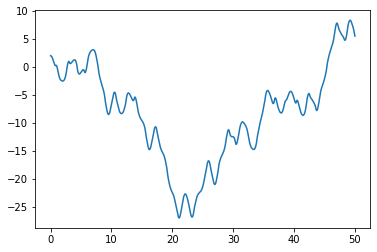

In [38]:
plt.plot(t,the1_1t)

Função que recebe o valor de $\theta_i$ e retorna a posição $ x_i $ e $ y_i $ das massas para fazer a animação.

In [39]:
def pos(t,the1,the2,l1,l2):
    x1 = -l1*np.sin(the1)
    y1 = -l1*np.cos(the1)
    x2 = -l2*np.sin(the2) + x1
    y2 = -l2*np.cos(the2) + y1
    return[
        x1,y1,x2,y2
    ]

x11,y11,x12,y12 = pos(t,the1_1t,the2_1t,l1,l2)
x21,y21,x22,y22 = pos(t,the1_2t,the2_2t,l1,l2)
x31,y31,x32,y32 = pos(t,the1_3t,the2_3t,l1,l2)

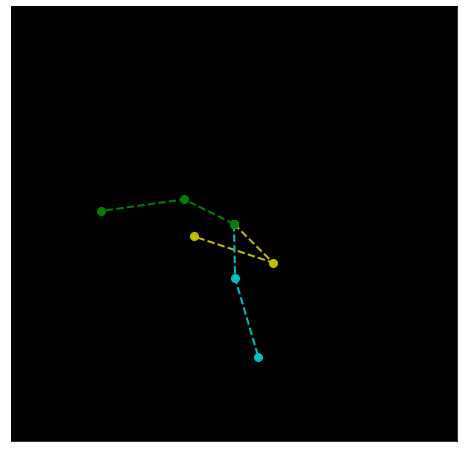

In [40]:
def animate(i):
    ln1.set_data([0, x11[i], x12[i]], [0, y11[i], y12[i]])
    ln2.set_data([0, x21[i], x22[i]], [0, y21[i], y22[i]])
    ln3.set_data([0, x31[i], x32[i]], [0, y31[i], y32[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # Para tirar o eixo x
ax.get_yaxis().set_ticks([])    

ln1, = plt.plot([], [], 'yo--', lw=2, markersize=8)
ln2, = plt.plot([], [], 'co--', lw=2, markersize=8)
ln3, = plt.plot([], [], 'go--', lw=2, markersize=8)

ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=n_passo, interval=50)
ani.save('pen.gif',writer='pillow',fps=len(t[t<1])) # FPS deve ser o número de intervalos em 1 segundo